<a href="https://colab.research.google.com/github/taizaoliveira/analisededados/blob/main/DesafioDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL

In [62]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/gdrive', force_remount=True)

!ls "/gdrive/My Drive/Trabalhos/Brazilian E-Commerce Public Dataset by Olist"

datasets_path = '/gdrive/My Drive/Trabalhos/Brazilian E-Commerce Public Dataset by Olist'
customers = os.path.join(datasets_path, 'olist_customers_dataset.csv')
geolocalization = os.path.join(datasets_path, 'olist_geolocation_dataset.csv')
orderItems = os.path.join(datasets_path, 'olist_order_items_dataset.csv')
orderPayments = os.path.join(datasets_path, 'olist_order_payments_dataset.csv')
orderReviews = os.path.join(datasets_path, 'olist_order_reviews_dataset.csv')
orderDataset = os.path.join(datasets_path, 'olist_orders_dataset.csv')
products = os.path.join(datasets_path, 'olist_products_dataset.csv')
sellers = os.path.join(datasets_path, 'olist_sellers_dataset.csv')
nameTranslation = os.path.join(datasets_path, 'product_category_name_translation.csv')

assert os.path.exists(customers), "O arquivo customers não existe no caminho especificado."
assert os.path.exists(geolocalization), "O arquivo geolocalization não existe no caminho especificado."
assert os.path.exists(orderItems), "O arquivo orderItems não existe no caminho especificado."
assert os.path.exists(orderPayments), "O arquivo orderPayments não existe no caminho especificado."
assert os.path.exists(orderReviews), "O arquivo orderReviews não existe no caminho especificado."
assert os.path.exists(orderDataset), "O arquivo orderDataset não existe no caminho especificado."
assert os.path.exists(products), "O arquivo products não existe no caminho especificado."
assert os.path.exists(sellers), "O arquivo sellers não existe no caminho especificado."
assert os.path.exists(nameTranslation), "O arquivo nameTranslation não existe no caminho especificado."

df_customers = pd.read_csv(customers)
df_geolocalization = pd.read_csv(geolocalization)
df_orderItems = pd.read_csv(orderItems)
df_orderPayments = pd.read_csv(orderPayments)
df_orderReviews = pd.read_csv(orderReviews)
df_orderDataset = pd.read_csv(orderDataset)
df_products = pd.read_csv(products)
df_sellers = pd.read_csv(sellers)
df_nameTranslation = pd.read_csv(nameTranslation)

def check_and_remove_duplicates(df, df_name):
    print(f"Verificando duplicatas em {df_name}...")
    duplicates = df.duplicated().sum()
    print(f"Duplicatas encontradas: {duplicates}")
    if duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicatas removidas. Total de registros após remoção: {len(df)}")
    else:
        print(f"Não há duplicatas em {df_name}.")

check_and_remove_duplicates(df_customers, 'customers')
check_and_remove_duplicates(df_geolocalization, 'geolocalization')
check_and_remove_duplicates(df_orderItems, 'orderItems')
check_and_remove_duplicates(df_orderPayments, 'orderPayments')
check_and_remove_duplicates(df_orderReviews, 'orderReviews')
check_and_remove_duplicates(df_orderDataset, 'orderDataset')
check_and_remove_duplicates(df_products, 'products')
check_and_remove_duplicates(df_sellers, 'sellers')
check_and_remove_duplicates(df_nameTranslation, 'nameTranslation')

def convert_to_datetime(df, date_columns):
    for column in date_columns:
        df[column] = pd.to_datetime(df[column])
        print(f"Coluna {column} convertida para datetime.")

convert_to_datetime(df_orderDataset, ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
convert_to_datetime(df_orderReviews, ['review_creation_date', 'review_answer_timestamp'])

print(df_orderDataset.info())
print(df_orderReviews.info())

Mounted at /gdrive
olist_customers_dataset.csv	  olist_products_dataset.csv
olist_geolocation_dataset.csv	  olist_sellers_dataset.csv
olist_order_items_dataset.csv	  Processed
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv   treated
olist_orders_dataset.csv
Verificando duplicatas em customers...
Duplicatas encontradas: 0
Não há duplicatas em customers.
Verificando duplicatas em geolocalization...
Duplicatas encontradas: 261831
Duplicatas removidas. Total de registros após remoção: 738332
Verificando duplicatas em orderItems...
Duplicatas encontradas: 0
Não há duplicatas em orderItems.
Verificando duplicatas em orderPayments...
Duplicatas encontradas: 0
Não há duplicatas em orderPayments.
Verificando duplicatas em orderReviews...
Duplicatas encontradas: 0
Não há duplicatas em orderReviews.
Verificando duplicatas em orderDataset...
Duplicatas encontradas: 0
Não há duplicatas em orderDataset.
Verificando duplicatas em products...
Du

### Transformação dos Dados

In [67]:
df_customers = pd.read_csv(customers)
df_geolocalization = pd.read_csv(geolocalization)
df_orderItems = pd.read_csv(orderItems)
df_orderPayments = pd.read_csv(orderPayments)
df_orderReviews = pd.read_csv(orderReviews)
df_orderDataset = pd.read_csv(orderDataset)
df_products = pd.read_csv(products)
df_sellers = pd.read_csv(sellers)
df_nameTranslation = pd.read_csv(nameTranslation)

print(df_customers.head())
print(df_geolocalization.head())
print(df_orderItems.head())
print(df_orderPayments.head())
print(df_orderReviews.head())
print(df_orderDataset.head())
print(df_products.head())
print(df_sellers.head())
print(df_nameTranslation.head())

df_merged = df_orderItems.merge(df_products, on='product_id')
df_merged2 = df_merged.merge(df_orderDataset, on='order_id')

df_merged2['order_purchase_timestamp'] = pd.to_datetime(df_merged2['order_purchase_timestamp'])


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                

### Carregamento dos Resultados

In [68]:
processed_data_path = '/gdrive/My Drive/Trabalhos/Brazilian E-Commerce Public Dataset by Olist/Processed'
os.makedirs(processed_data_path, exist_ok=True)

df_merged2.to_csv(os.path.join(processed_data_path, 'merged_data.csv'), index=False)


# Análise Exploratória

### Análise de Performance de Vendas
Volume de Vendas por Categoria: Identificar quais categorias de produtos têm o maior volume de vendas e em quais períodos (mensal, trimestral).



<ipython-input-69-d3272b51b489>:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_vendas_trimestral_agrupado['order_purchase_timestamp'] = pd.to_datetime(df_vendas_trimestral_agrupado['order_purchase_timestamp'])


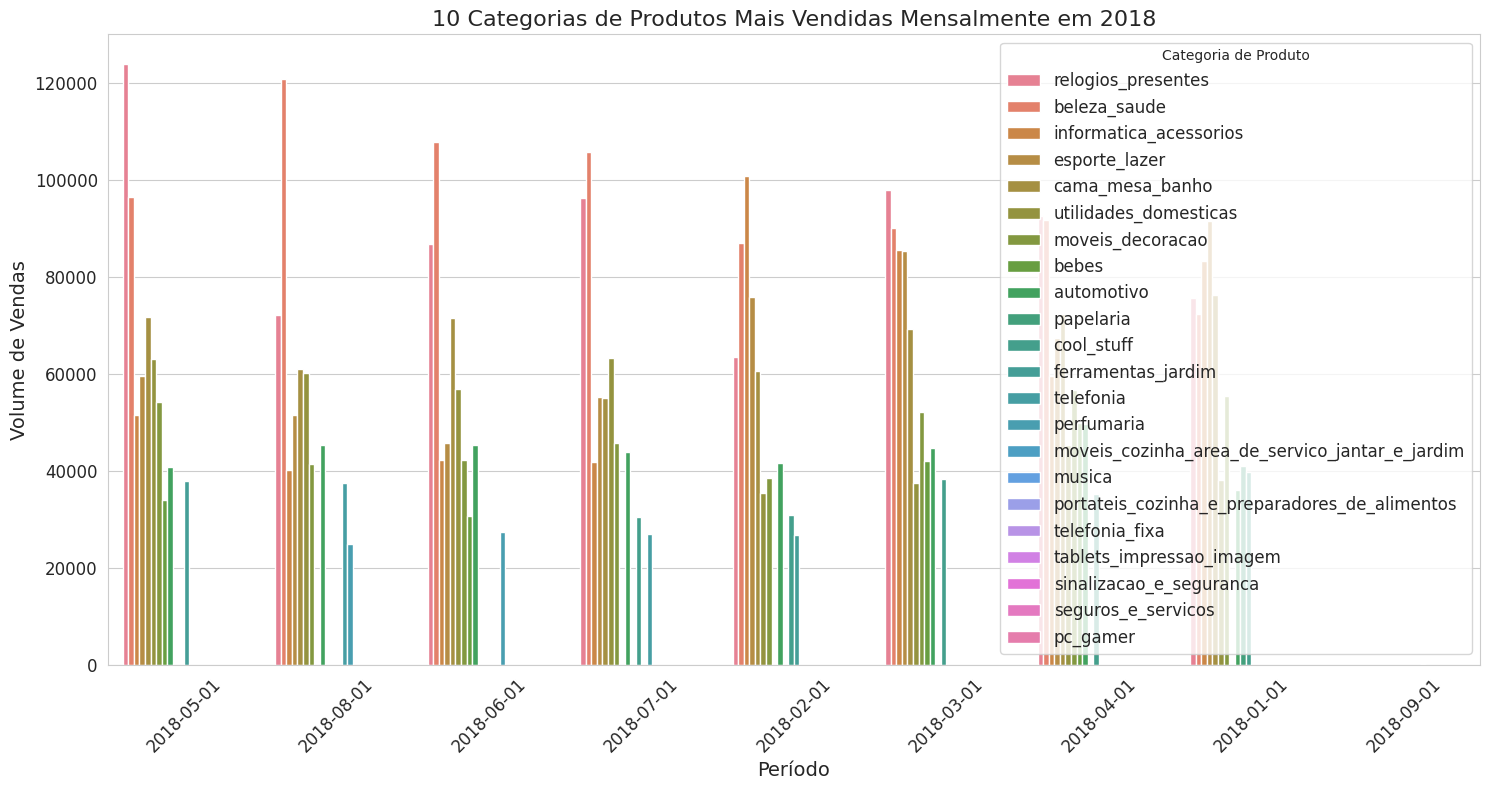

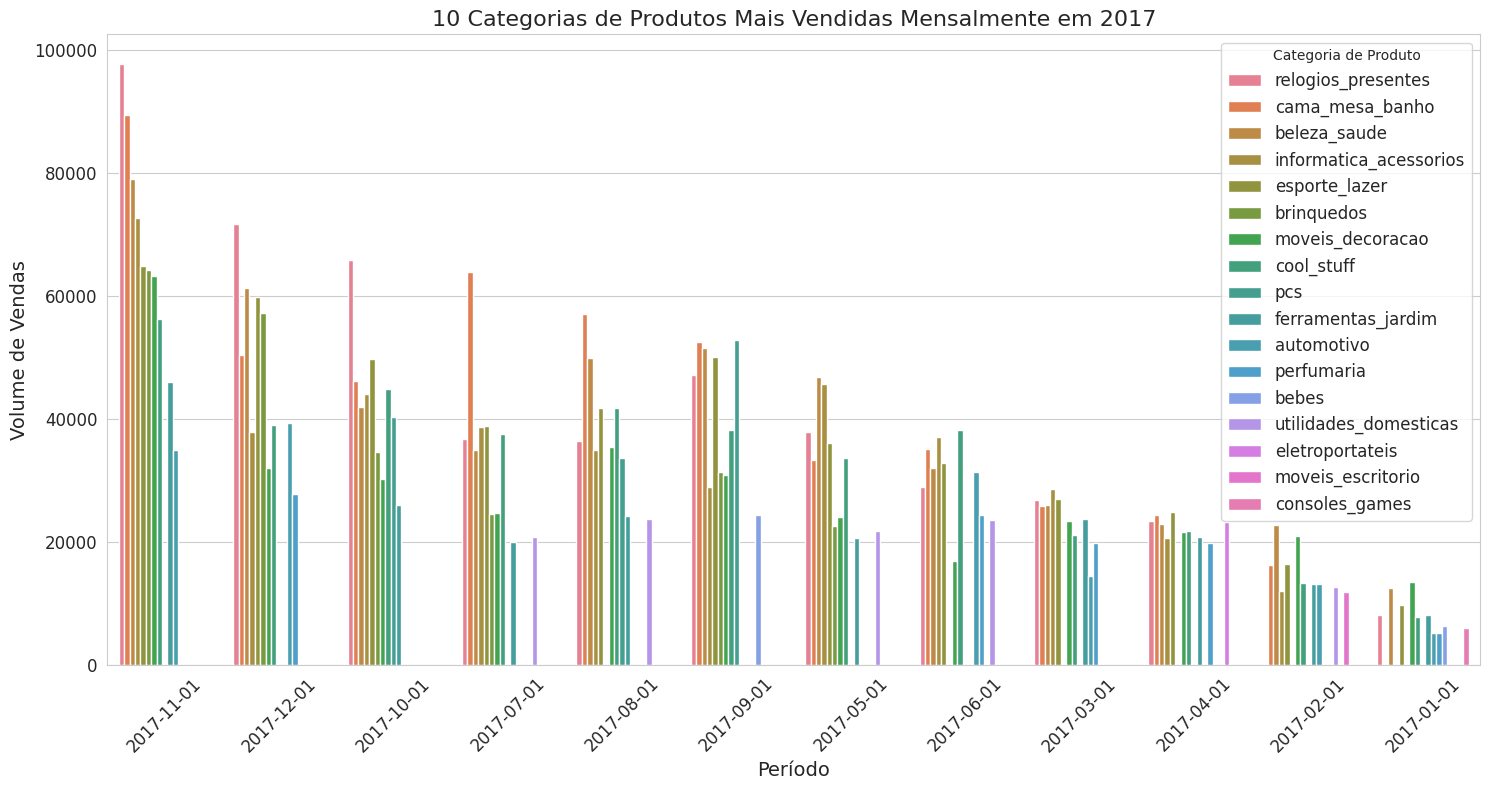

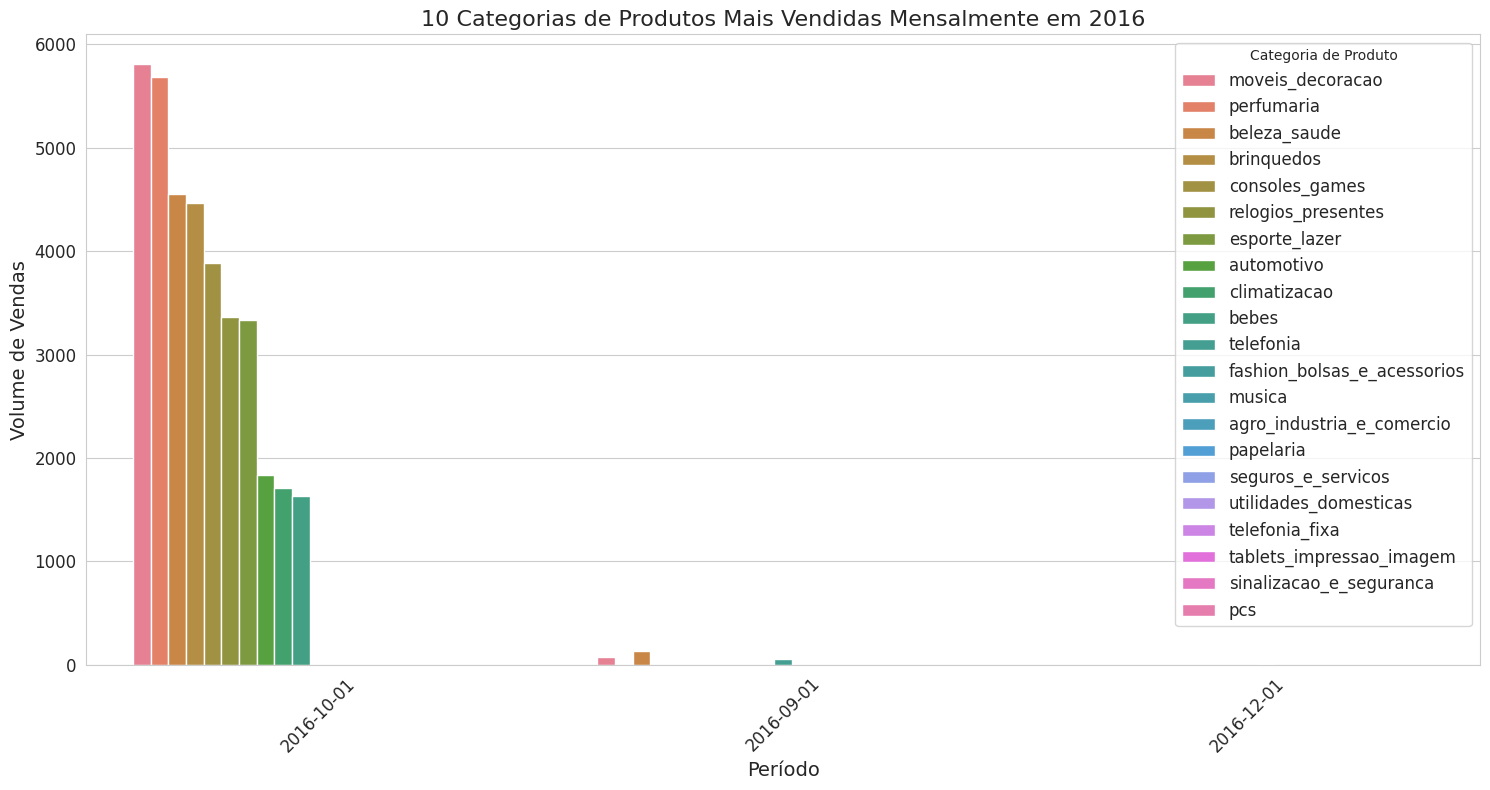

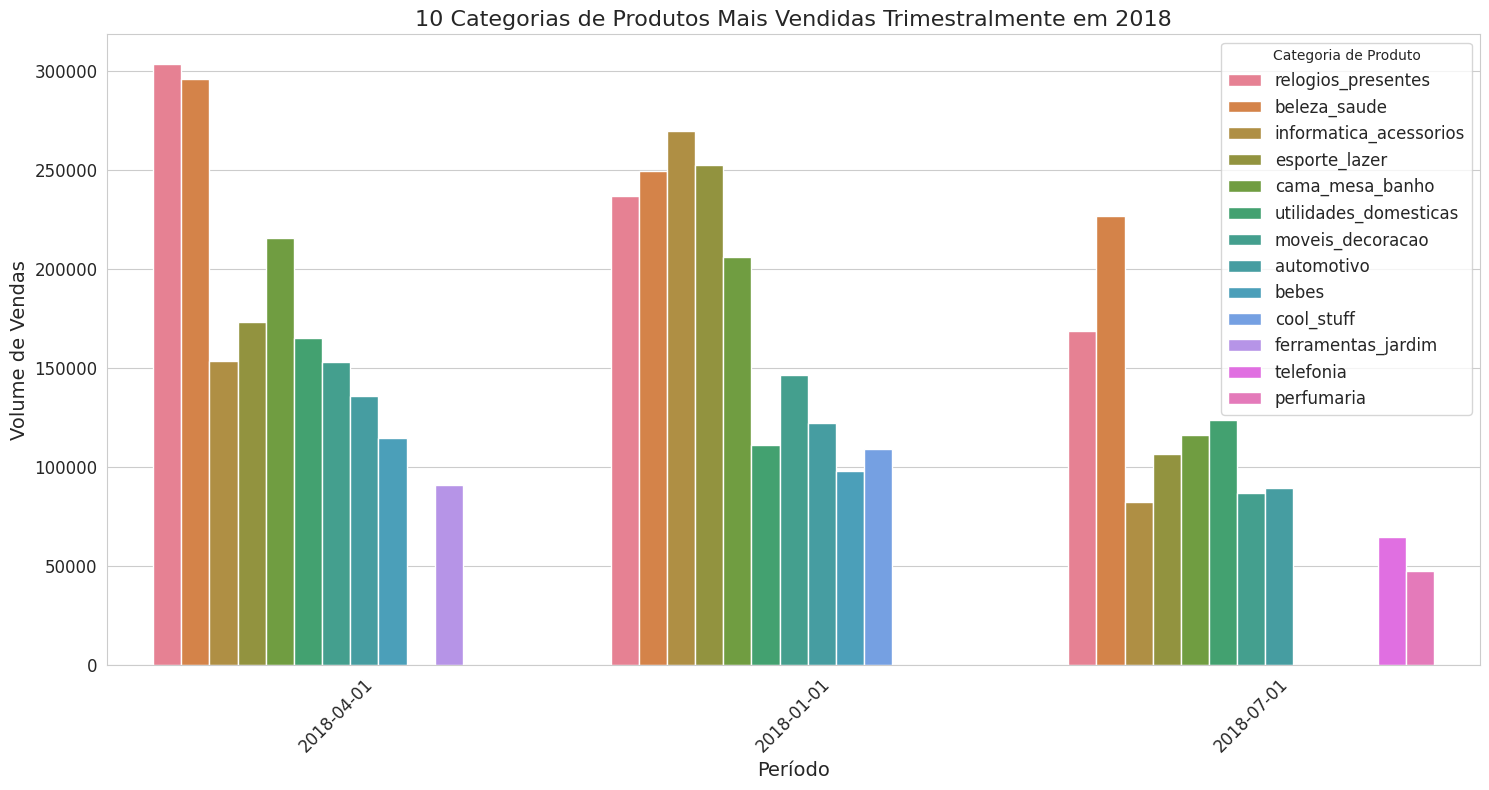

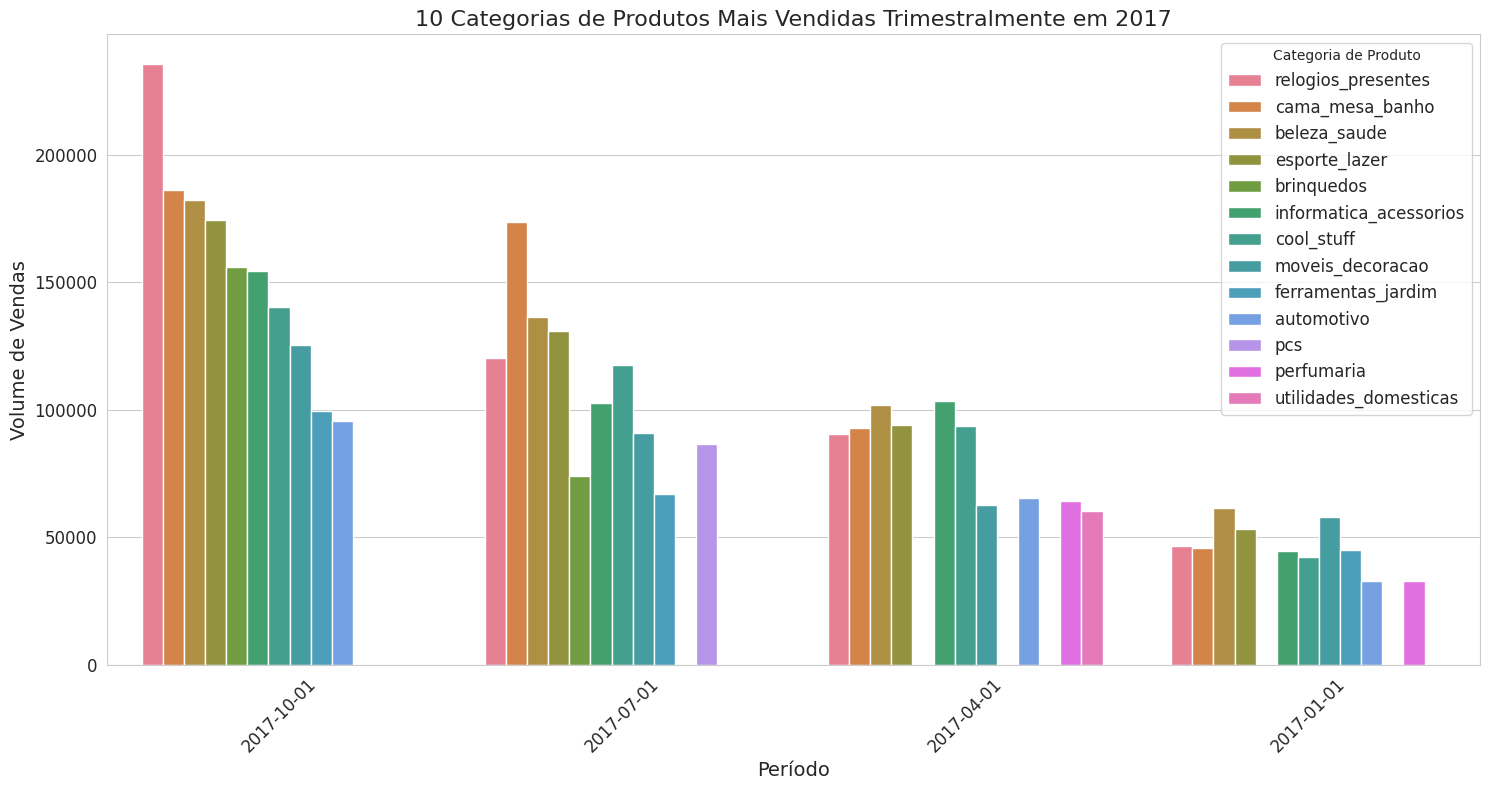

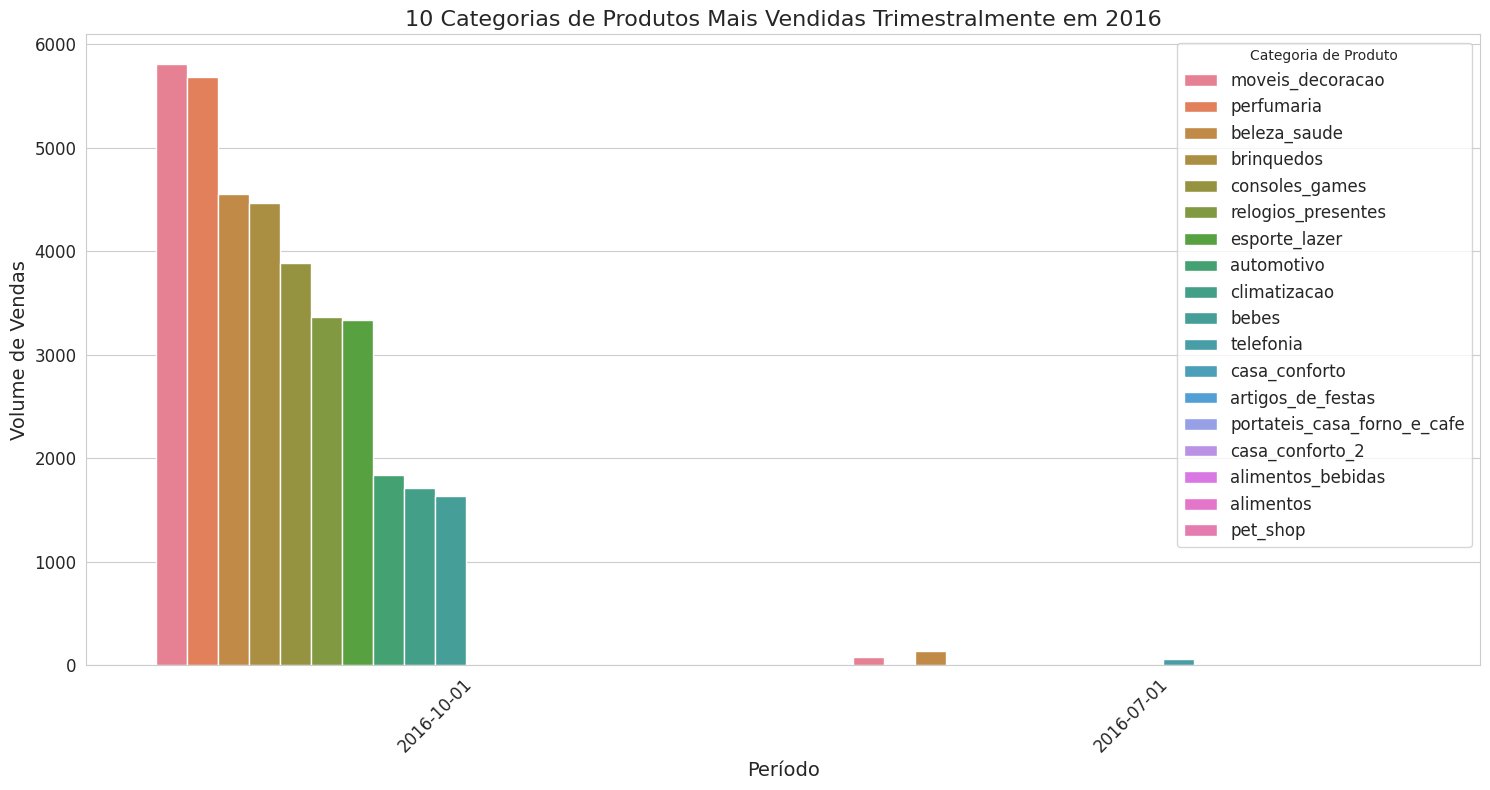

In [69]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

vendas_por_categoria_mensal = defaultdict(lambda: defaultdict(float))
vendas_por_categoria_trimestral = defaultdict(lambda: defaultdict(float))

for _, row in df_merged2.iterrows():
    categoria = row['product_category_name']
    mes = row['order_purchase_timestamp'].strftime('%Y-%m')
    trimestre = row['order_purchase_timestamp'].to_period('Q').strftime('%Y-Q%q')
    preco = row['price']

    vendas_por_categoria_mensal[categoria][mes] += preco
    vendas_por_categoria_trimestral[categoria][trimestre] += preco

df_vendas_mensal = pd.DataFrame(vendas_por_categoria_mensal).T.reset_index()
df_vendas_mensal = df_vendas_mensal.melt(id_vars='index', var_name='order_purchase_timestamp', value_name='volume_de_vendas')
df_vendas_mensal.rename(columns={'index': 'product_category_name'}, inplace=True)

df_vendas_trimestral = pd.DataFrame(vendas_por_categoria_trimestral).T.reset_index()
df_vendas_trimestral = df_vendas_trimestral.melt(id_vars='index', var_name='order_purchase_timestamp', value_name='volume_de_vendas')
df_vendas_trimestral.rename(columns={'index': 'product_category_name'}, inplace=True)

df_vendas_mensal_agrupado = df_vendas_mensal.groupby(['product_category_name', 'order_purchase_timestamp'])['volume_de_vendas'].sum().reset_index()
df_vendas_trimestral_agrupado = df_vendas_trimestral.groupby(['product_category_name', 'order_purchase_timestamp'])['volume_de_vendas'].sum().reset_index()

df_vendas_mensal_agrupado['order_purchase_timestamp'] = pd.to_datetime(df_vendas_mensal_agrupado['order_purchase_timestamp'])
df_vendas_trimestral_agrupado['order_purchase_timestamp'] = pd.to_datetime(df_vendas_trimestral_agrupado['order_purchase_timestamp'])

df_vendas_mensal_agrupado = df_vendas_mensal_agrupado.sort_values(by='volume_de_vendas', ascending=False)
df_vendas_trimestral_agrupado = df_vendas_trimestral_agrupado.sort_values(by='volume_de_vendas', ascending=False)

top_10_mensal = df_vendas_mensal_agrupado.groupby('order_purchase_timestamp').head(10)
top_10_trimestral = df_vendas_trimestral_agrupado.groupby('order_purchase_timestamp').head(10)

anos = df_vendas_mensal_agrupado['order_purchase_timestamp'].dt.year.unique()

def criar_grafico(df, titulo):
    plt.figure(figsize=(15, 8))
    sns.set_style('whitegrid')
    sns.set_palette('muted')
    sns.barplot(x='order_purchase_timestamp', y='volume_de_vendas', hue='product_category_name', data=df)
    plt.title(titulo, fontsize=16)
    plt.xlabel('Período', fontsize=14)
    plt.ylabel('Volume de Vendas', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Categoria de Produto', fontsize=12)
    plt.tight_layout()
    plt.show()

for ano in anos:
    top_10_mensal_ano = top_10_mensal[top_10_mensal['order_purchase_timestamp'].dt.year == ano]
    criar_grafico(top_10_mensal_ano, f'10 Categorias de Produtos Mais Vendidas Mensalmente em {ano}')

for ano in anos:
    top_10_trimestral_ano = top_10_trimestral[top_10_trimestral['order_purchase_timestamp'].dt.year == ano]
    criar_grafico(top_10_trimestral_ano, f'10 Categorias de Produtos Mais Vendidas Trimestralmente em {ano}')


### Análise de Logística
Prazos de Entrega: Calcular o tempo médio de entrega e identificar os fatores que influenciam atrasos nas entregas.

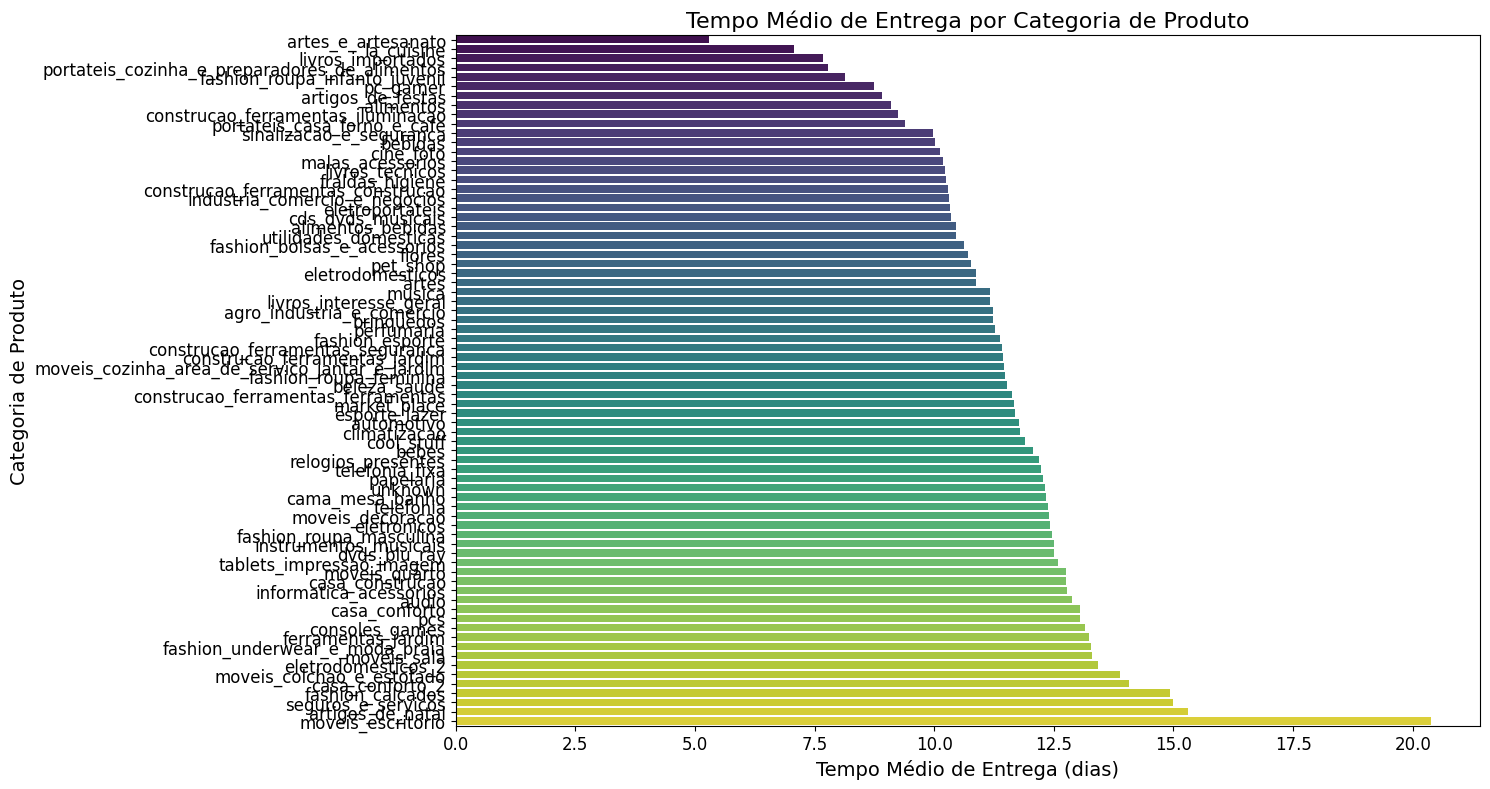

 
Tempo Médio de Entrega Geral: 12.007722603361284 dias


In [58]:
df_orderDataset['order_delivered_customer_date'] = pd.to_datetime(df_orderDataset['order_delivered_customer_date'])
df_orderDataset['order_purchase_timestamp'] = pd.to_datetime(df_orderDataset['order_purchase_timestamp'])
df_orderDataset['delivery_time'] = (df_orderDataset['order_delivered_customer_date'] - df_orderDataset['order_purchase_timestamp']).dt.days

df_delivery_time = df_orderItems.merge(df_orderDataset, on='order_id')
df_delivery_time = df_delivery_time.merge(df_products, on='product_id')
df_delivery_time['product_category_name'].fillna('unknown', inplace=True)

df_delivery_avg = df_delivery_time.groupby('product_category_name')['delivery_time'].mean().reset_index()
df_delivery_avg = df_delivery_avg.sort_values(by='delivery_time')

plt.figure(figsize=(15, 8))
sns.barplot(x='delivery_time', y='product_category_name', data=df_delivery_avg, hue='product_category_name', palette='viridis', legend=False)
plt.title('Tempo Médio de Entrega por Categoria de Produto', fontsize=16)
plt.xlabel('Tempo Médio de Entrega (dias)', fontsize=14)
plt.ylabel('Categoria de Produto', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print(" ")

tempo_medio_entrega_geral = df_delivery_time['delivery_time'].mean()
print("Tempo Médio de Entrega Geral:", tempo_medio_entrega_geral, "dias")


### Análise de Satisfação do Cliente
Avaliações de Produtos: Analisar a distribuição das avaliações dos produtos e identificar os produtos com as melhores e piores avaliações.



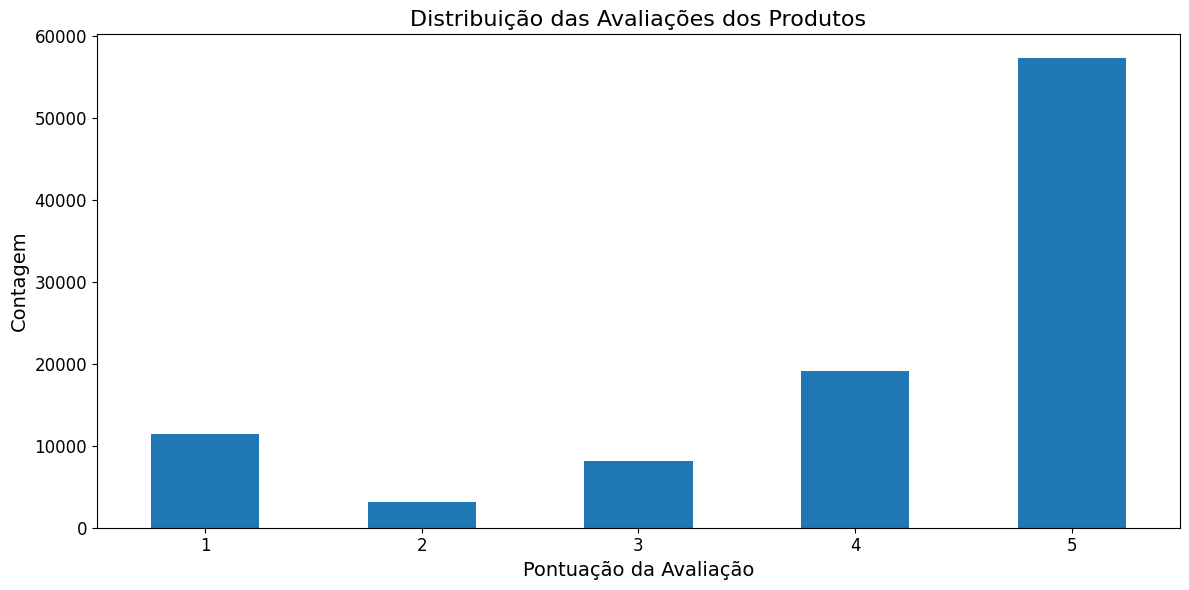

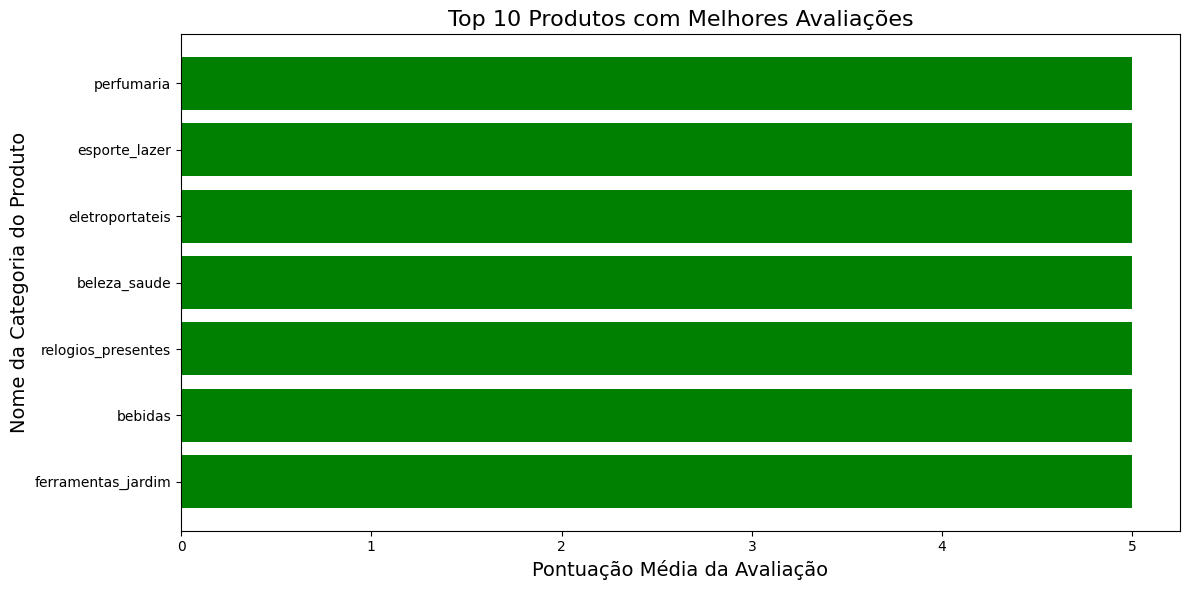

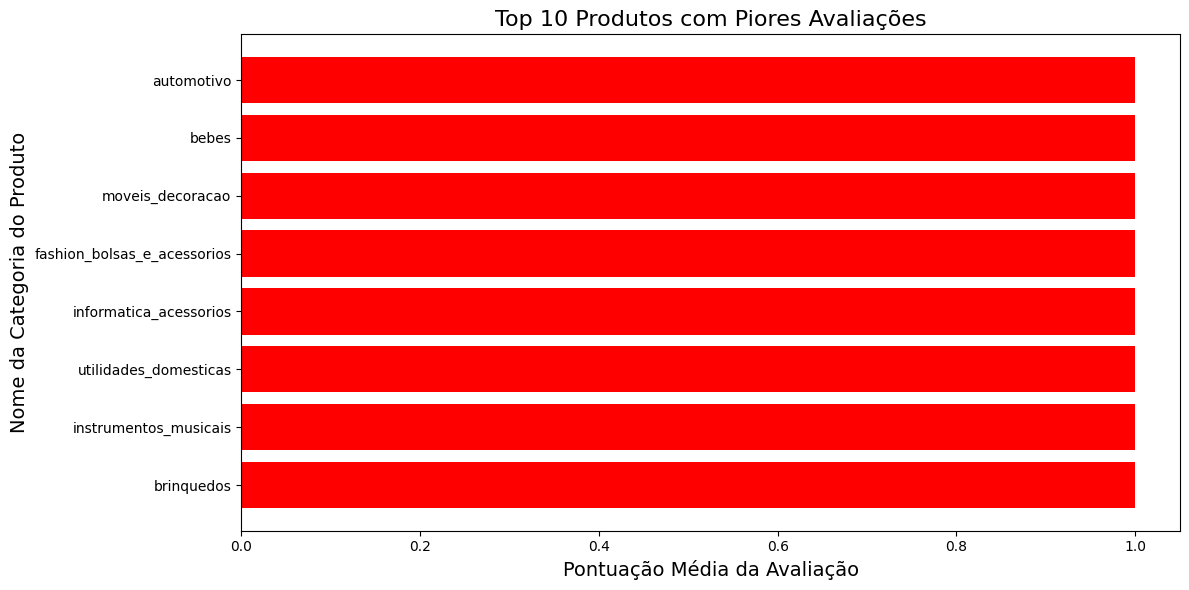

In [57]:
df_orderReviews['review_score'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição das Avaliações dos Produtos', fontsize=16)
plt.xlabel('Pontuação da Avaliação', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

df_reviews = df_orderItems.merge(df_orderReviews, on='order_id')
df_reviews = df_reviews.merge(df_products, on='product_id')

df_reviews_avg = df_reviews.groupby('product_id').agg({'review_score': 'mean', 'product_category_name': 'first'}).reset_index()

melhores_avaliacoes = df_reviews_avg.sort_values(by='review_score', ascending=False).head(10)
piores_avaliacoes = df_reviews_avg.sort_values(by='review_score').head(10)

print("  ")

melhores_avaliacoes.dropna(subset=['product_category_name'], inplace=True)
piores_avaliacoes.dropna(subset=['product_category_name'], inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(melhores_avaliacoes['product_category_name'], melhores_avaliacoes['review_score'], color='green')
plt.xlabel('Pontuação Média da Avaliação', fontsize=14)
plt.ylabel('Nome da Categoria do Produto', fontsize=14)
plt.title('Top 10 Produtos com Melhores Avaliações', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("  ")

plt.figure(figsize=(12, 6))
plt.barh(piores_avaliacoes['product_category_name'], piores_avaliacoes['review_score'], color='red')
plt.xlabel('Pontuação Média da Avaliação', fontsize=14)
plt.ylabel('Nome da Categoria do Produto', fontsize=14)
plt.title('Top 10 Produtos com Piores Avaliações', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Análise Financeira
Análise de Lucratividade por Categoria: Calcular a lucratividade de diferentes categorias de produtos, levando em conta o custo dos produtos e o preço de venda.

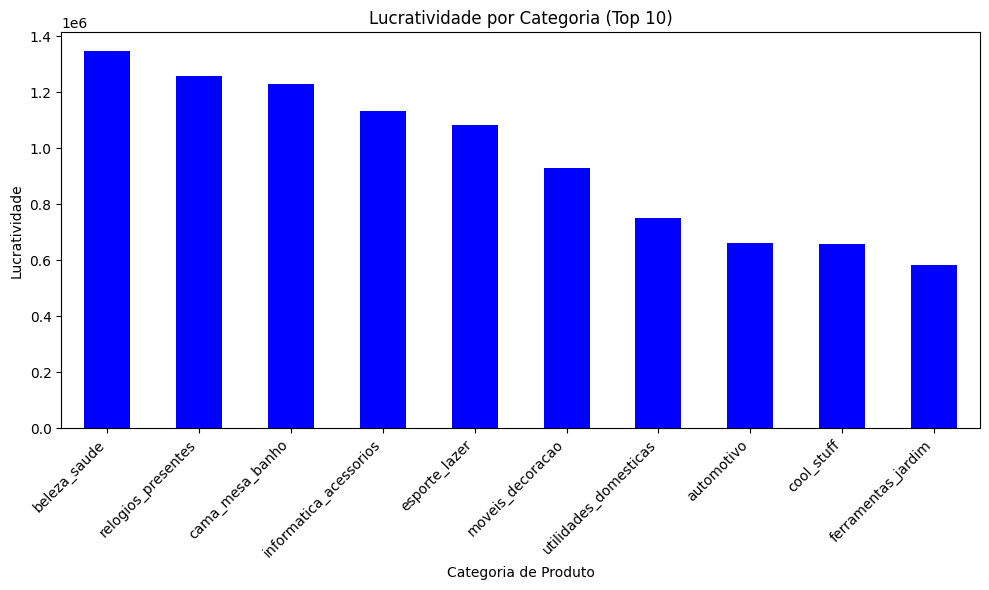

In [56]:
sales_data = df_orderItems.merge(df_products, on='product_id')
sales_data['total_cost'] = sales_data['price'] * sales_data['order_item_id']
category_profitability = sales_data.groupby('product_category_name')['total_cost'].sum()

top_10_profitable_categories = category_profitability.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_profitable_categories.plot(kind='bar', color='blue')
plt.title('Lucratividade por Categoria (Top 10)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Análise de Marketing
Eficácia de Campanhas Promocionais: Avaliar o impacto de campanhas promocionais e descontos no volume de vendas e na aquisição de novos clientes.

is_promotion
0    90177
1    22473
Name: count, dtype: int64
is_new_customer
0    78673
1    33977
Name: count, dtype: int64
  order_purchase_timestamp  total_sales  num_orders  num_customers
0                  2016-09        84.98           2              2
1                  2016-10     10151.55          69             69
2                  2017-01     23511.85         177            177
3                  2017-02     47311.77         360            360
4                  2017-03     75174.82         575            575
  order_purchase_timestamp  total_sales  num_orders  num_customers
0                  2016-09       162.87           2              2
1                  2016-10     15405.35         117            117
2                  2016-12        10.90           1              1
3                  2017-01     32437.78         258            258
4                  2017-02     80775.61         568            568


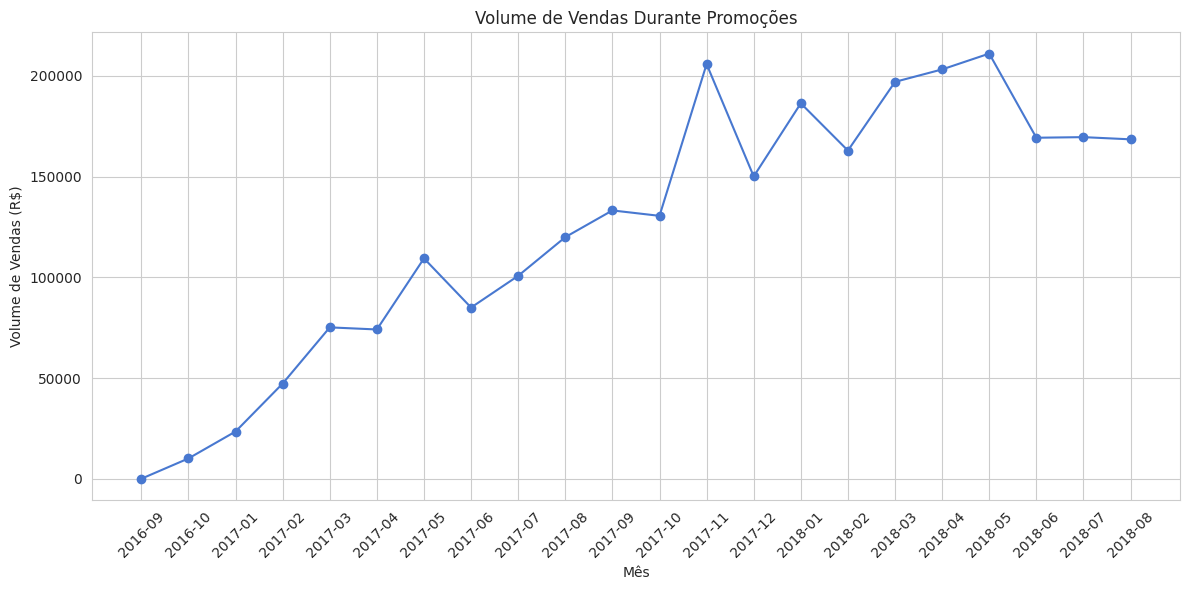

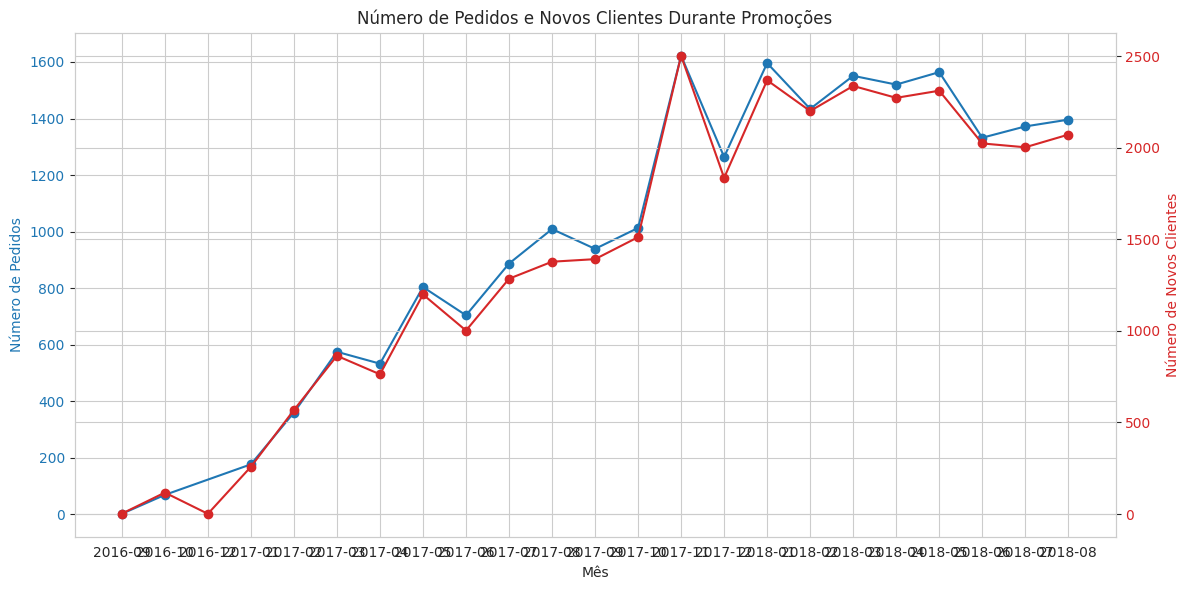

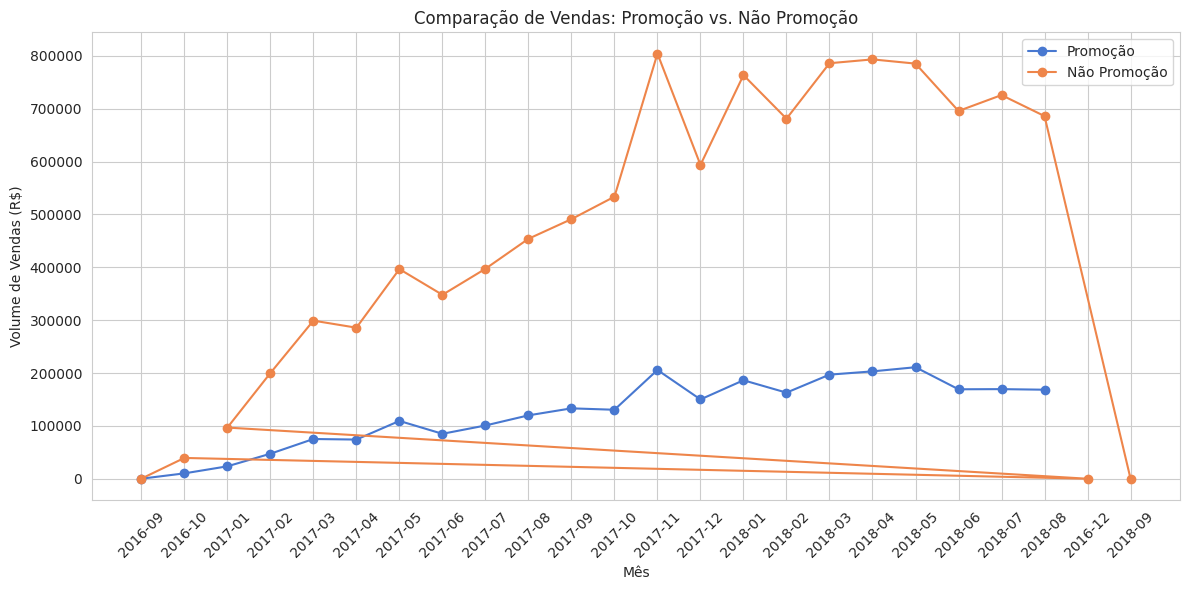

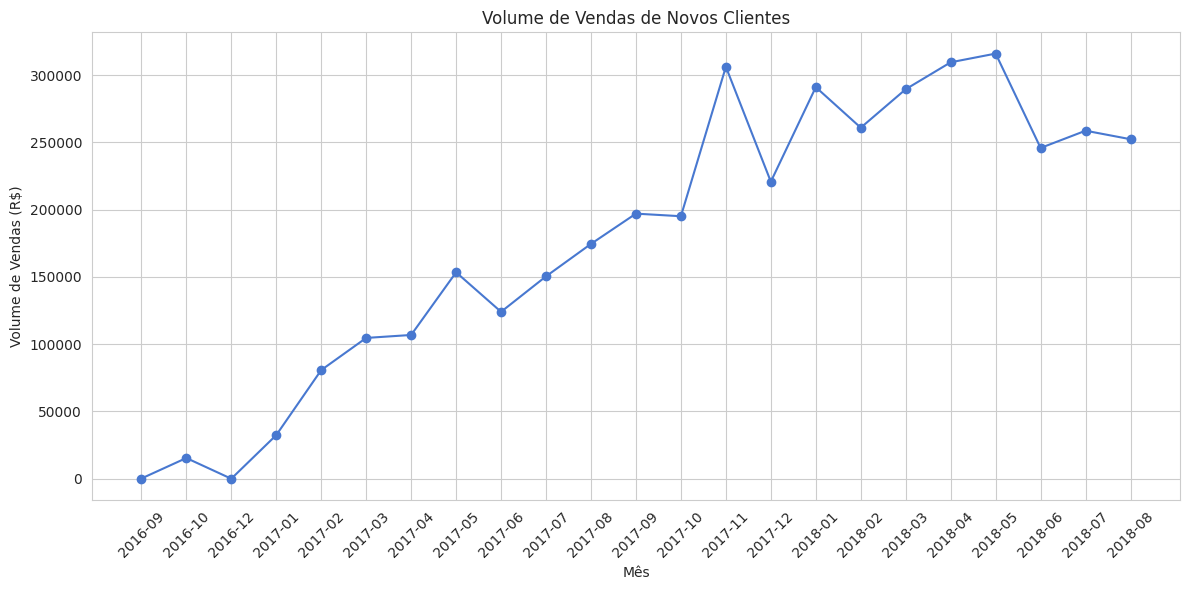

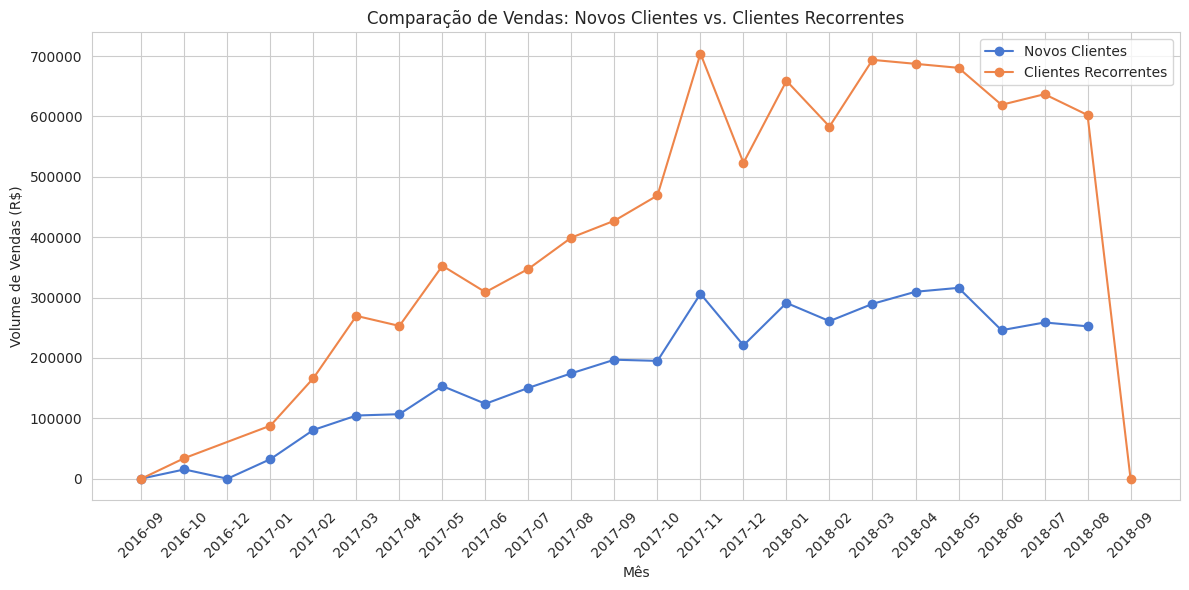

In [75]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_merged = df_orderItems.merge(df_products, on='product_id')
df_merged2 = df_merged.merge(df_orderDataset, on='order_id')

df_merged2['order_purchase_timestamp'] = pd.to_datetime(df_merged2['order_purchase_timestamp'])

np.random.seed(42)
df_merged2['is_promotion'] = np.random.choice([0, 1], size=len(df_merged2), p=[0.8, 0.2])

df_merged2['is_new_customer'] = df_merged2['customer_id'].apply(lambda x: np.random.choice([0, 1], p=[0.7, 0.3]))

print(df_merged2['is_promotion'].value_counts())
print(df_merged2['is_new_customer'].value_counts())

df_promotions = df_merged2[df_merged2['is_promotion'] == 1]
df_new_customers = df_merged2[df_merged2['is_new_customer'] == 1]

df_sales_promotion = df_promotions.groupby(df_promotions['order_purchase_timestamp'].dt.to_period('M')).agg({
    'price': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).rename(columns={
    'price': 'total_sales',
    'order_id': 'num_orders',
    'customer_id': 'num_customers'
}).reset_index()

df_sales_new_customers = df_new_customers.groupby(df_new_customers['order_purchase_timestamp'].dt.to_period('M')).agg({
    'price': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).rename(columns={
    'price': 'total_sales',
    'order_id': 'num_orders',
    'customer_id': 'num_customers'
}).reset_index()

print(df_sales_promotion.head())
print(df_sales_new_customers.head())

plt.figure(figsize=(12, 6))
plt.plot(df_sales_promotion['order_purchase_timestamp'].astype(str), df_sales_promotion['total_sales'], marker='o', linestyle='-')
plt.title('Volume de Vendas Durante Promoções')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Mês')
ax1.set_ylabel('Número de Pedidos', color=color)
ax1.plot(df_sales_promotion['order_purchase_timestamp'].astype(str), df_sales_promotion['num_orders'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Número de Novos Clientes', color=color)
ax2.plot(df_sales_new_customers['order_purchase_timestamp'].astype(str), df_sales_new_customers['num_customers'], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Número de Pedidos e Novos Clientes Durante Promoções')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

df_merged2['period'] = df_merged2['order_purchase_timestamp'].dt.to_period('M')

sales_promotion = df_merged2[df_merged2['is_promotion'] == 1].groupby('period')['price'].sum()
sales_no_promotion = df_merged2[df_merged2['is_promotion'] == 0].groupby('period')['price'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_promotion.index.astype(str), sales_promotion, marker='o', linestyle='-', label='Promoção')
plt.plot(sales_no_promotion.index.astype(str), sales_no_promotion, marker='o', linestyle='-', label='Não Promoção')
plt.title('Comparação de Vendas: Promoção vs. Não Promoção')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_sales_new_customers['order_purchase_timestamp'].astype(str), df_sales_new_customers['total_sales'], marker='o', linestyle='-')
plt.title('Volume de Vendas de Novos Clientes')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales_new_customers = df_merged2[df_merged2['is_new_customer'] == 1].groupby('period')['price'].sum()
sales_recurring_customers = df_merged2[df_merged2['is_new_customer'] == 0].groupby('period')['price'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_new_customers.index.astype(str), sales_new_customers, marker='o', linestyle='-', label='Novos Clientes')
plt.plot(sales_recurring_customers.index.astype(str), sales_recurring_customers, marker='o', linestyle='-', label='Clientes Recorrentes')
plt.title('Comparação de Vendas: Novos Clientes vs. Clientes Recorrentes')
plt.xlabel('Mês')
plt.ylabel('Volume de Vendas (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
